In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('loan_data_set.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(480, 13)

In [9]:
df = df.drop(['Loan_ID'] , axis=1)

In [10]:
df['Loan_Status']  = df['Loan_Status'].map({'Y':1 , 'N':0})

In [11]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

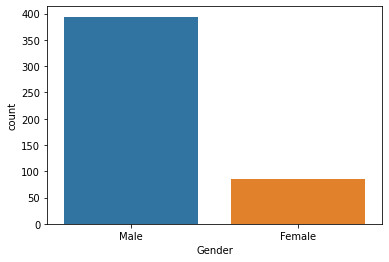

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(df['Gender'])

In [13]:
df.groupby('Gender')['Loan_Status'].mean()*100

Gender
Female    62.790698
Male      70.558376
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Gender'>

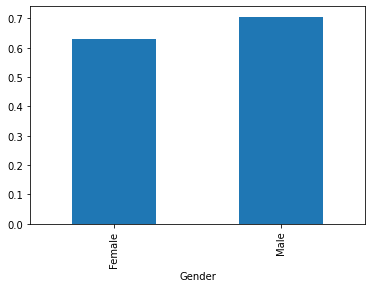

In [14]:
df.groupby('Gender')['Loan_Status'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Gender', ylabel='count'>

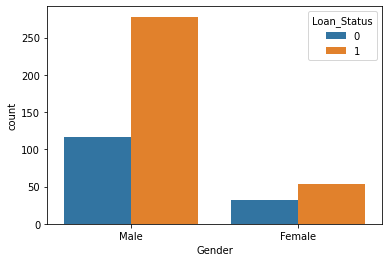

In [15]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

In [16]:
df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

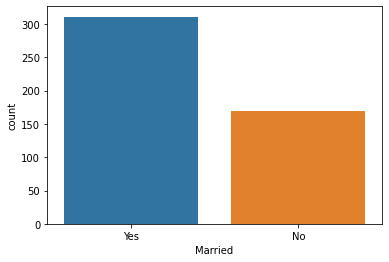

In [17]:
sns.countplot(df['Married'])

In [18]:
df.groupby('Married')['Loan_Status'].mean()*100

Married
No     62.130178
Yes    72.990354
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Married'>

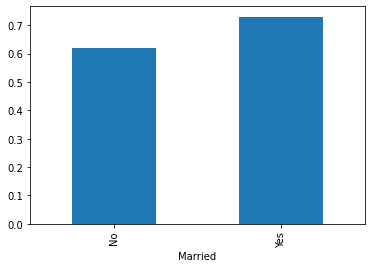

In [19]:
df.groupby('Married')['Loan_Status'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Married', ylabel='count'>

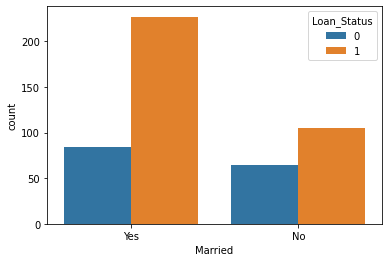

In [20]:
sns.countplot(df['Married'],hue=df['Loan_Status'])

In [21]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

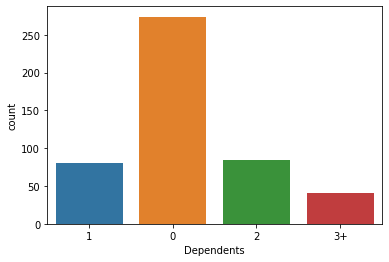

In [22]:
sns.countplot(df['Dependents'])

In [23]:
df.groupby('Dependents')['Loan_Status'].mean()*100

Dependents
0     68.248175
1     65.000000
2     76.470588
3+    68.292683
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Dependents'>

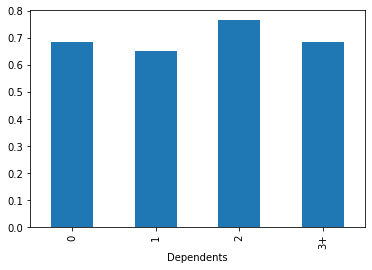

In [24]:
df.groupby('Dependents')['Loan_Status'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

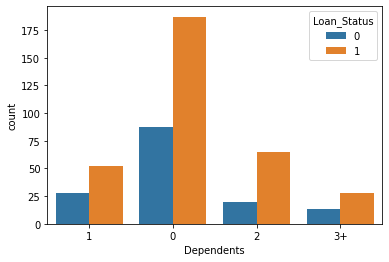

In [25]:
sns.countplot(df['Dependents'] ,hue= df['Loan_Status'])

In [26]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

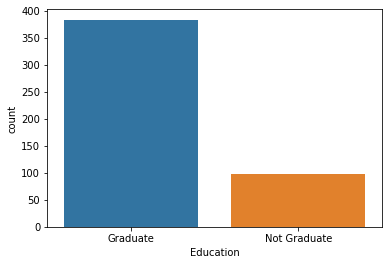

In [27]:
sns.countplot(df['Education'])

In [28]:
df.groupby(['Education'])['Loan_Status'].mean()*100

Education
Graduate        70.757180
Not Graduate    62.886598
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Education'>

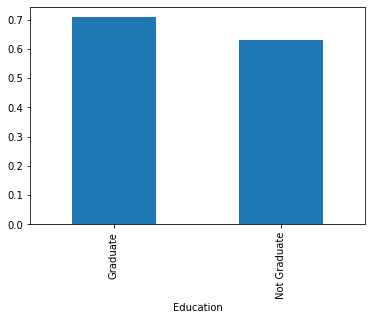

In [29]:
df.groupby(['Education'])['Loan_Status'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Education', ylabel='count'>

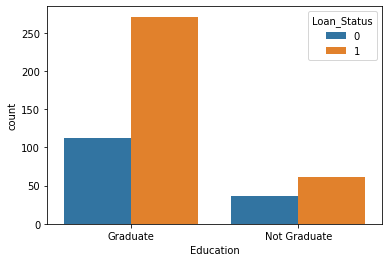

In [30]:
sns.countplot(df['Education'],hue = df['Loan_Status'])

In [31]:
df['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

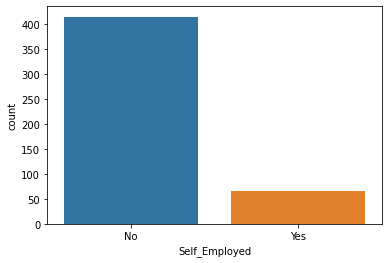

In [32]:
sns.countplot(df['Self_Employed'])

In [33]:
df.groupby('Self_Employed')['Loan_Status'].mean()*100

Self_Employed
No     69.806763
Yes    65.151515
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Self_Employed'>

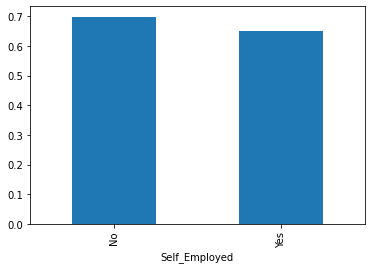

In [34]:
df.groupby('Self_Employed')['Loan_Status'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

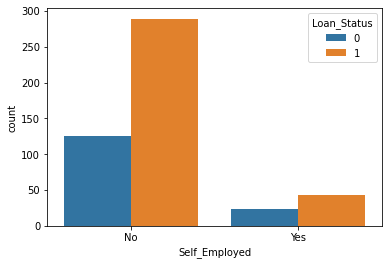

In [35]:
sns.countplot(df['Self_Employed'] , hue=df['Loan_Status'])

In [36]:
df['Loan_Amount_Term'].value_counts()/len(df)*100

360.0    85.625000
180.0     7.500000
480.0     2.500000
300.0     1.875000
120.0     0.625000
84.0      0.625000
60.0      0.416667
240.0     0.416667
36.0      0.416667
Name: Loan_Amount_Term, dtype: float64

In [37]:
df.groupby('Loan_Amount_Term')['Loan_Status'].mean()*100

Loan_Amount_Term
36.0       0.000000
60.0     100.000000
84.0      66.666667
120.0    100.000000
180.0     66.666667
240.0     50.000000
300.0     44.444444
360.0     71.046229
480.0     33.333333
Name: Loan_Status, dtype: float64

In [38]:
df = df.drop(columns='Loan_Amount_Term')

In [39]:
df['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

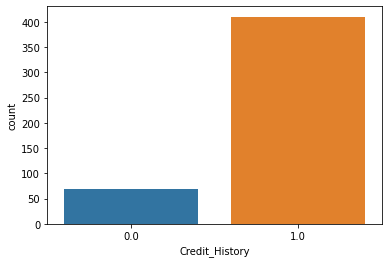

In [40]:
sns.countplot(df['Credit_History'])

In [41]:
df.groupby(['Credit_History'])['Loan_Status'].mean()*100

Credit_History
0.0    10.000000
1.0    79.268293
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Credit_History'>

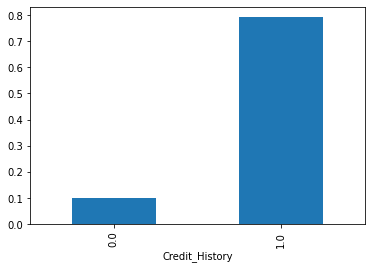

In [42]:
df.groupby(['Credit_History'])['Loan_Status'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

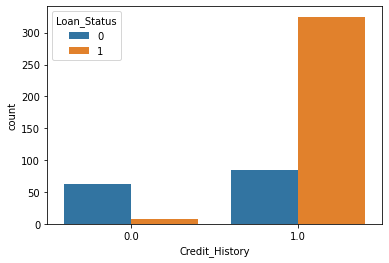

In [43]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])

In [44]:
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

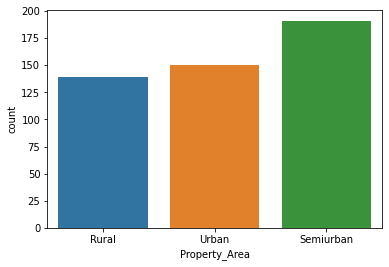

In [45]:
sns.countplot(df['Property_Area'])

In [46]:
df.groupby('Property_Area')['Loan_Status'].mean()*100

Property_Area
Rural        61.151079
Semiurban    78.010471
Urban        65.333333
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Property_Area'>

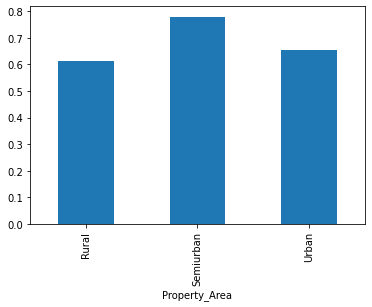

In [47]:
df.groupby('Property_Area')['Loan_Status'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

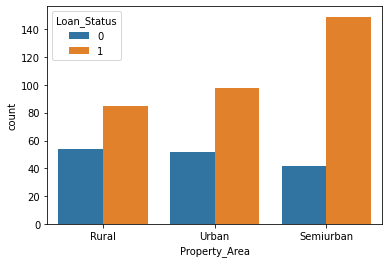

In [48]:
sns.countplot(df['Property_Area'],hue = df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

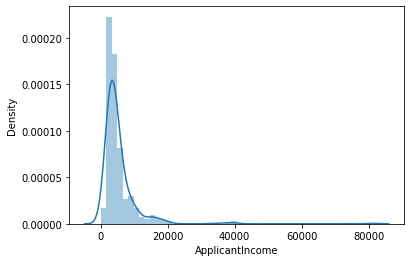

In [49]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

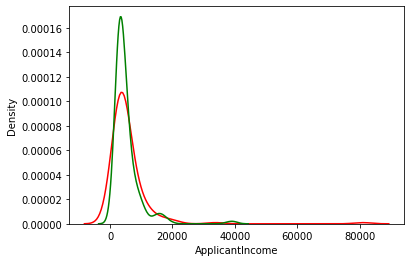

In [50]:
sns.kdeplot(df[df['Loan_Status']==0]['ApplicantIncome'],color='red')
sns.kdeplot(df[df['Loan_Status']==1]['ApplicantIncome'],color='green')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

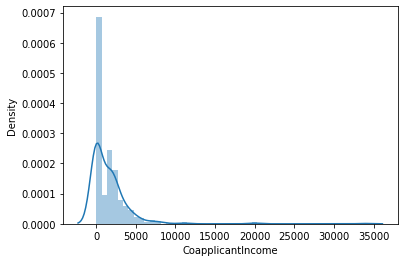

In [51]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

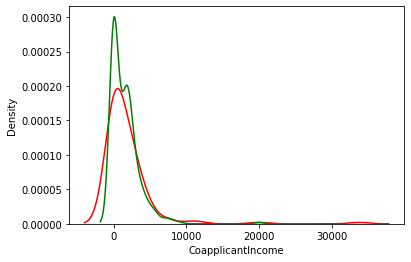

In [52]:
sns.kdeplot(df[df['Loan_Status']==0]['CoapplicantIncome'],color='red')
sns.kdeplot(df[df['Loan_Status']==1]['CoapplicantIncome'],color='green')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

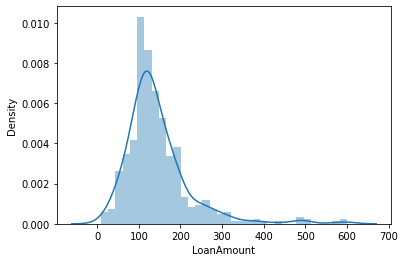

In [53]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

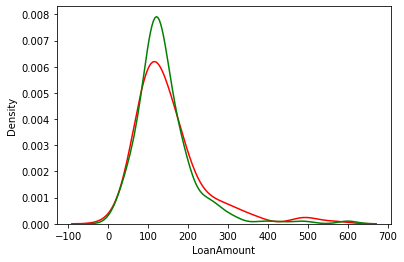

In [54]:
sns.kdeplot(df[df['Loan_Status']==0]['LoanAmount'],color='red')
sns.kdeplot(df[df['Loan_Status']==1]['LoanAmount'],color='green')

In [55]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,-0.040773,-0.071753
Credit_History,-0.056152,-0.008692,-0.040773,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,0.529390,1.000000


# Model Building

In [56]:
df['Education'] = df['Education'].map({'Not Graduate': 0 , 'Graduate':1})

In [57]:
from sklearn.metrics import accuracy_score , precision_score , recall_score ,f1_score,confusion_matrix,classification_report

In [58]:
df = pd.get_dummies(data=df , columns=['Gender' , 'Married' ,'Dependents' ,'Self_Employed','Property_Area','Credit_History'],drop_first=True)

In [59]:
df

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
1,1,4583,1508.0,128.0,0,1,1,1,0,0,0,0,0,1
2,1,3000,0.0,66.0,1,1,1,0,0,0,1,0,1,1
3,0,2583,2358.0,120.0,1,1,1,0,0,0,0,0,1,1
4,1,6000,0.0,141.0,1,1,0,0,0,0,0,0,1,1
5,1,5417,4196.0,267.0,1,1,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,2900,0.0,71.0,1,0,0,0,0,0,0,0,0,1
610,1,4106,0.0,40.0,1,1,1,0,0,1,0,0,0,1
611,1,8072,240.0,253.0,1,1,1,1,0,0,0,0,1,1
612,1,7583,0.0,187.0,1,1,1,0,1,0,0,0,1,1


In [60]:
X = df.drop(columns=['Loan_Status'])
y  = df.loc[:,'Loan_Status']

In [61]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2 , random_state=1)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((384, 13), (96, 13), (384,), (96,))

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

# Model Evaluation

In [63]:
accuracy_score(y_test , y_pred)

0.7083333333333334

In [64]:
precision_score(y_test , y_pred)

0.7160493827160493

In [65]:
confusion_matrix(y_test,y_pred)

array([[10, 23],
       [ 5, 58]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.30      0.42        33
           1       0.72      0.92      0.81        63

    accuracy                           0.71        96
   macro avg       0.69      0.61      0.61        96
weighted avg       0.70      0.71      0.67        96



In [67]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train , y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.52      0.42      0.47        33
           1       0.72      0.79      0.76        63

    accuracy                           0.67        96
   macro avg       0.62      0.61      0.61        96
weighted avg       0.65      0.67      0.66        96



# Using SHAPASH for explainability

In [68]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer(xgb)

In [72]:
xpl.compile(X_test,y_target=y_test)

In [73]:
app = xpl.run_app(title_story='Loan Dataset')

Dash is running on http://0.0.0.0:8050/



INFO:root:Your Shapash application run on http://DESKTOP-U0EG7VM:8050/


Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app 'shapash.webapp.smart_app'
 * Debug mode: off


INFO:werkzeug: * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://172.23.199.217:8050 (Press CTRL+C to quit)
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:14:14] "GET / HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:14:15] "GET /assets/material-icons.css?m=1667971381.126375 HTTP/1.1" 304 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:14:15] "GET /assets/style.css?m=1667971381.136375 HTTP/1.1" 304 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:14:15] "GET /assets/jquery.js?m=1667971381.123375 HTTP/1.1" 304 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:14:15] "GET /assets/main.js?m=1667971381.125399 HTTP/1.1" 304 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:14:15] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:14:15] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:14:16] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HT

INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:28] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:28] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:28] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:34] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:34] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:34] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:34] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:34] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:39] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 16:17:39] "POST /_dash-update-compon

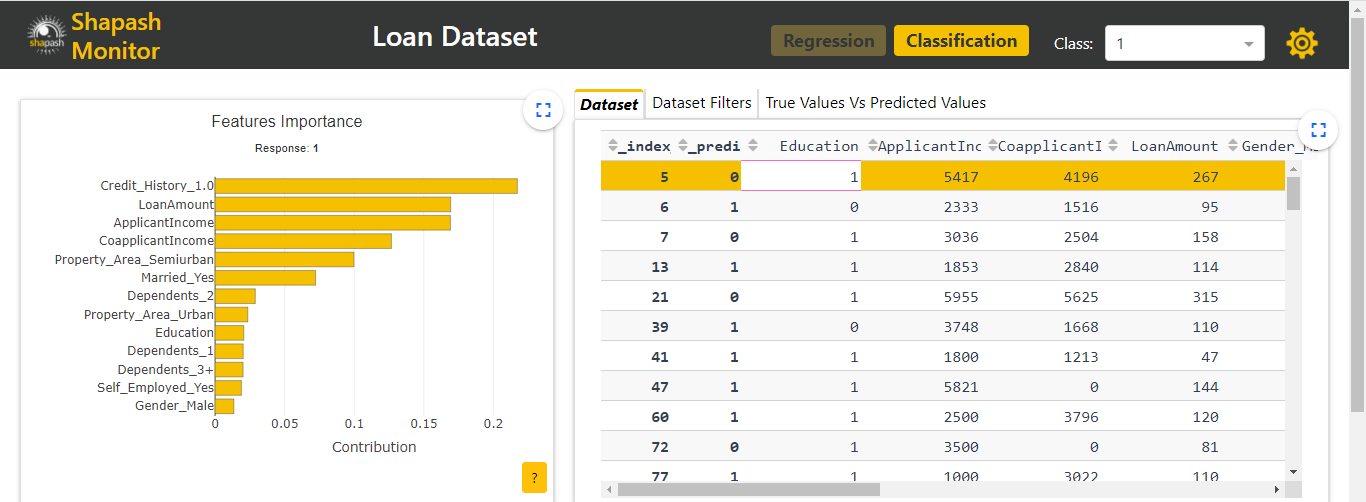

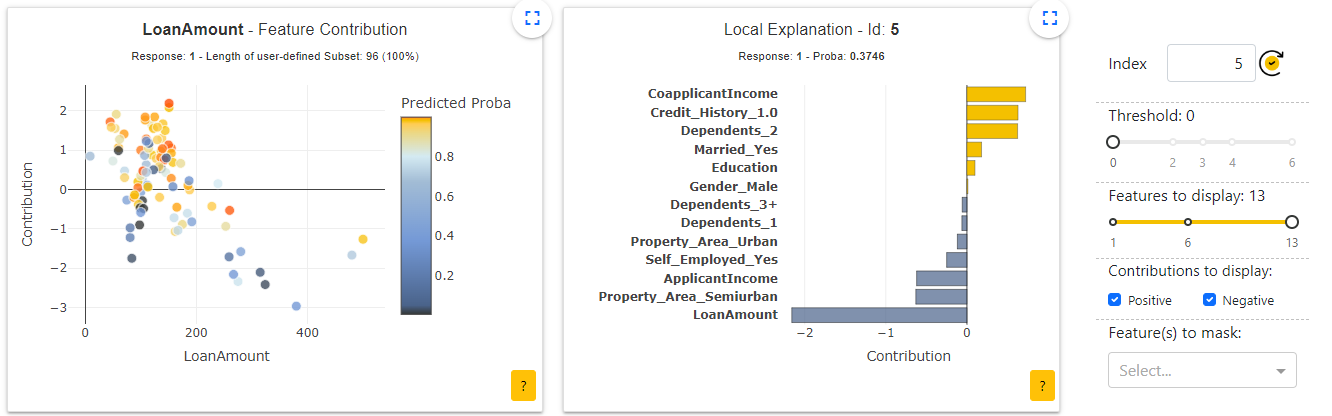

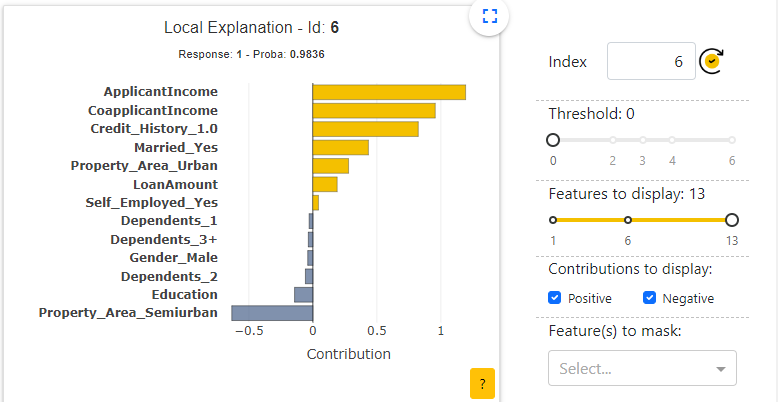

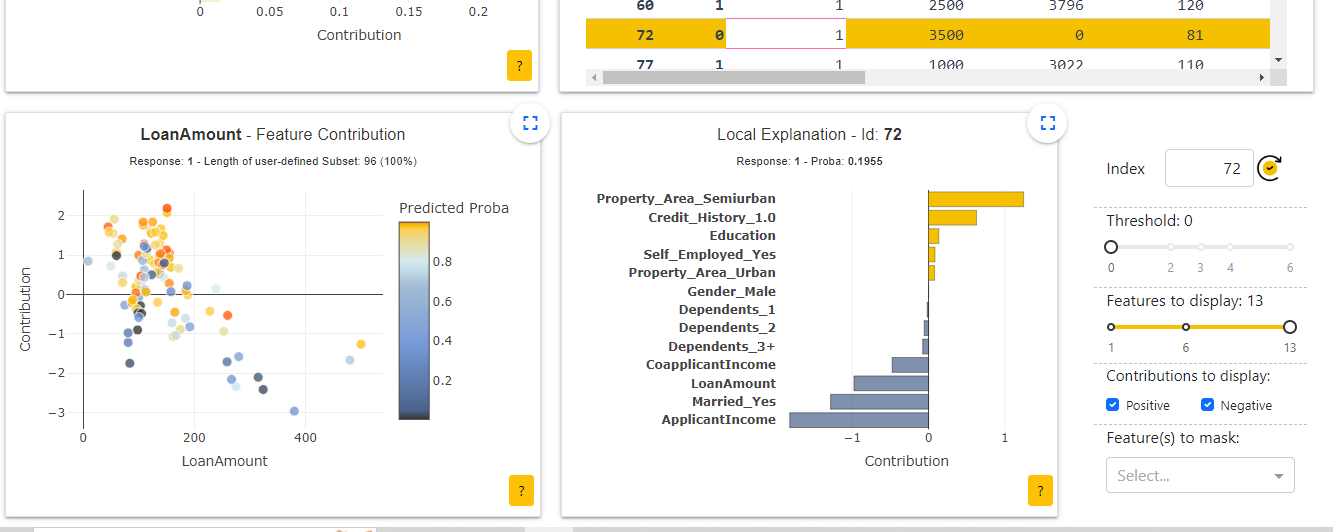

In [74]:
predictor = xpl.to_smartpredictor()

In [75]:
predictor.save('./predictor.pkl')

In [76]:
from shapash.utils.load_smartpredictor import load_smartpredictor
predictor_load = load_smartpredictor('./predictor.pkl')

INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:04] "POST /_dash-update-component HTTP/1.1" 204 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:04] "POST /_dash-update-component HTTP/1.1" 204 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:05] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:11] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:18] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:18] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:22] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:22] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:22] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:172.23.199.217 - - [09/Nov/2022 18:36:59] "POST /_dash-update-compon